## Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact, fixed
from tqdm import tqdm

plt.rcParams["figure.figsize"] = (14, 4)
pd.options.display.max_columns = 500

## Load

In [3]:
daily_train = pd.read_parquet("../data/processed/daily-train-base.parquet")
daily_train

,id,ds,t,y,category
0,1,1994-03-01 12:00:00,1,1017.1,Macro
4227,1,1994-03-02 12:00:00,2,1019.3,Macro
8454,1,1994-03-03 12:00:00,3,1017.0,Macro
12681,1,1994-03-04 12:00:00,4,1019.2,Macro
16908,1,1994-03-05 12:00:00,5,1018.7,Macro
...,...,...,...,...,...
18750971,4227,2012-04-22 12:00:00,4436,15111.5,Other
18755198,4227,2012-04-23 12:00:00,4437,15154.0,Other
18759425,4227,2012-04-24 12:00:00,4438,15208.6,Other
18763652,4227,2012-04-25 12:00:00,4439,15108.0,Other


In [24]:
@interact(df=fixed(daily_train), key=widgets.Dropdown(options=list(daily_train.id.unique())))
def plot_ts(df, key):
    fig = px.line(df.loc[df.id == key, ["ds", "y"]].set_index("ds"))
    return fig

interactive(children=(Dropdown(description='key', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, …

In [21]:
daily_train_features = pd.read_csv("../data/processed/daily_train_r_features.csv")
daily_train_features

,id,acf1,acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,season_acf1,pacf5,diff1_pacf5,diff2_pacf5,season_pacf,trend_strength,seasonal_strength_week,seasonal_peak_week,seasonal_trough_week,spikiness,linearity,curvature,stl_e_acf1,stl_e_acf10,spectral_entropy,ndiffs,nsdiffs,n_crossing_points,longest_flat_spot,var_tiled_mean,var_tiled_var
0,1,0.997059,9.687135e+00,-0.029772,7.626758e-03,-0.518825,2.734535e-01,0.979941,9.942914e-01,7.633271e-03,5.424459e-01,-0.010700,0.999745,0.212893,5,2,8.365195e-03,9853.294673,1325.739954,0.326544,0.342042,0.009502,1,0,9,150,1.010469,0.000011
1,2,0.997316,9.702510e+00,-0.004649,4.072618e-03,-0.520349,2.801685e-01,0.980919,9.961016e-01,3.727573e-03,5.231172e-01,0.010722,0.997425,0.167491,6,2,3.652157e-01,7551.941915,-411.018633,0.353714,0.337406,0.211226,1,0,12,93,0.997391,0.000358
2,3,0.916272,3.739627e+00,-0.012783,2.531199e-03,-0.498712,2.487157e-01,0.458197,8.435482e-01,1.878764e-03,5.251920e-01,-0.032470,0.919896,0.162490,4,3,6.091840e+01,238.468579,304.150654,0.319871,0.273264,0.610410,1,0,4,9,0.800603,0.755309
3,4,0.846963,2.404443e+00,-0.070979,5.882831e-02,-0.502273,3.038757e-01,0.334851,7.176773e-01,5.054175e-02,5.979179e-01,0.033282,0.850668,0.241823,1,0,2.571114e+03,319.034648,1086.075281,0.279155,0.225505,0.740640,0,0,32,6,0.829212,0.167636
4,5,0.974411,7.241019e+00,0.110908,1.220225e-01,-0.477198,3.813929e-01,0.805430,9.575942e-01,3.493730e-02,4.545096e-01,-0.017917,0.989273,0.289039,5,1,3.821326e+04,11248.036869,867.517007,0.359820,0.333743,0.281091,1,0,1,30,1.035495,0.014047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4222,4223,0.068836,2.568894e-02,-0.001475,5.514170e-05,-0.007557,1.436517e-04,0.042044,1.491678e-02,7.155843e-06,8.258976e-05,0.027377,0.512779,0.241573,1,2,7.069972e+06,-1092.843208,-357.321423,-0.105579,0.048743,0.996563,0,0,27,288,0.201078,36.505275
4223,4224,0.175845,1.787344e-01,-0.001751,3.800695e-04,-0.020961,8.487453e-04,0.112377,7.729266e-02,1.646795e-04,6.507336e-04,0.040451,0.577006,0.240908,1,2,7.051393e+06,-611.845729,-693.134000,-0.103305,0.047747,0.973822,0,0,21,102,0.304386,24.372381
4224,4225,0.000164,1.052583e-07,0.000027,9.116194e-08,0.000097,1.464056e-07,0.000039,8.559907e-08,2.591848e-08,6.655798e-08,0.000039,0.472912,0.239622,1,2,6.484301e+13,-44703.400633,54048.752687,-0.103532,0.049391,1.000000,0,0,21,264,0.142605,38.708765
4225,4226,0.999604,9.947588e+00,0.032557,1.659804e-02,-0.515475,2.734492e-01,0.996580,1.007626e+00,1.381027e-02,5.033698e-01,0.032775,0.999671,0.159099,6,4,9.547394e-02,-9727.089480,-18421.178971,0.352933,0.381551,0.238542,1,0,21,802,0.999410,0.000010


In [64]:
daily_train_features[daily_train_features_scaled.spectral_entropy.abs() > 3]

,id,acf1,acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,season_acf1,pacf5,diff1_pacf5,diff2_pacf5,season_pacf,trend_strength,seasonal_strength_week,seasonal_peak_week,seasonal_trough_week,spikiness,linearity,curvature,stl_e_acf1,stl_e_acf10,spectral_entropy,ndiffs,nsdiffs,n_crossing_points,longest_flat_spot,var_tiled_mean,var_tiled_var
3,4,0.846963,2.404443e+00,-0.070979,5.882831e-02,-0.502273,3.038757e-01,0.334851,7.176773e-01,5.054175e-02,5.979179e-01,0.033282,0.850668,0.241823,1,0,2.571114e+03,319.034648,1086.075281,0.279155,0.225505,0.740640,0,0,32,6,0.829212,0.167636
139,140,0.144457,1.055808e-01,-0.495076,2.453648e-01,-0.664858,4.684550e-01,0.081310,4.801810e-02,4.974258e-01,1.134189e+00,0.039701,0.335215,0.170208,4,3,1.000234e+11,7203.871397,-10592.489784,-0.185558,0.140838,0.997173,1,0,8,39,0.270047,13.349716
428,429,0.362771,1.022667e+00,0.004780,2.018515e-03,-0.004042,2.545985e-03,0.303578,2.757974e-01,8.147346e-04,1.833966e-03,0.068081,0.685352,0.236829,2,1,2.413286e+04,-401.736573,-97.115356,-0.102378,0.057930,0.910066,1,0,12,34,0.457522,9.597352
1897,1898,0.846553,2.953240e+00,-0.185563,4.571643e-02,-0.550497,3.160323e-01,0.387068,7.347736e-01,5.016382e-02,6.959627e-01,-0.065253,0.854816,0.143837,5,2,3.735224e-02,-11.508951,13.436184,0.197371,0.190573,0.777880,0,0,121,11,0.750531,0.067249
1933,1934,0.921199,4.752502e+00,-0.011970,7.579424e-02,-0.410423,2.691511e-01,0.588102,8.774706e-01,4.060203e-02,5.643363e-01,-0.030731,0.920662,0.181252,6,1,2.918722e-02,-18.755973,43.590864,0.305012,0.386779,0.705212,0,0,69,18,0.846886,0.122002
2010,2011,0.666937,3.446354e+00,0.013418,1.939466e-03,-0.012887,3.661918e-03,0.556895,6.741456e-01,1.402754e-03,2.053558e-03,0.031850,0.862828,0.226170,2,1,1.774562e+05,3474.549399,-1831.197868,-0.051117,0.058805,0.732825,1,0,23,48,0.770737,2.677990
2038,2039,0.417839,4.422297e-01,-0.180310,3.415431e-01,-0.500462,5.607174e-01,0.087913,2.611704e-01,3.030764e-01,7.710059e-01,0.043399,0.314057,0.165421,2,0,3.064872e+01,-105.222235,-104.209804,0.177851,0.719994,0.852761,1,0,44,2,0.229588,0.382556
2151,2152,0.650517,7.938444e-01,-0.080990,1.727423e-01,-0.382398,2.755311e-01,0.025424,4.844468e-01,2.027394e-01,7.176844e-01,-0.148772,0.632100,0.173921,3,1,2.499689e+09,7602.169338,-5056.907518,0.183037,0.405575,0.879405,0,0,27,8,0.490762,0.757225
2196,2197,0.408299,1.006366e+00,-0.492031,2.432437e-01,-0.669898,4.828590e-01,0.266164,2.911638e-01,4.511391e-01,1.111592e+00,0.027569,0.563829,0.195860,4,3,1.225967e+06,1658.791231,-389.312423,-0.193563,0.166811,0.903280,1,0,19,44,0.508152,8.365703
3609,3610,0.827572,1.555132e+00,0.000034,2.490189e-01,-0.499990,6.236439e-01,0.136507,7.355067e-01,2.490187e-01,7.230258e-01,-0.053525,0.806534,0.219782,4,2,6.902564e+08,22641.229614,-21875.205556,0.436405,0.921973,0.823715,1,0,12,346,0.756563,7.755408


In [41]:
from sklearn.preprocessing import StandardScaler

In [45]:
daily_train_features_scaled = StandardScaler().fit_transform(daily_train_features)
daily_train_features_scaled = pd.DataFrame(daily_train_features_scaled, columns=daily_train_features.columns, index=daily_train_features.index)
daily_train_features_scaled

,id,acf1,acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,season_acf1,pacf5,diff1_pacf5,diff2_pacf5,season_pacf,trend_strength,seasonal_strength_week,seasonal_peak_week,seasonal_trough_week,spikiness,linearity,curvature,stl_e_acf1,stl_e_acf10,spectral_entropy,ndiffs,nsdiffs,n_crossing_points,longest_flat_spot,var_tiled_mean,var_tiled_var
0,-1.731641,0.218500,0.526302,-0.503468,-0.271062,-0.674229,0.139022,0.483114,0.199038,-0.369771,0.281940,-0.327706,0.286369,0.324084,0.930614,-0.361194,-0.016582,-0.431023,0.107179,-0.006970,0.089970,-2.050348,-0.166125,0.0,-1.065134,-0.274377,0.254914,-0.058699
1,-1.730822,0.223121,0.536902,-0.198585,-0.313279,-0.701168,0.240657,0.491338,0.227298,-0.474083,0.031865,0.275305,0.218448,-1.102201,1.440756,-0.361194,-0.016582,-0.459282,0.072977,0.380953,0.043126,-0.578649,-0.166125,0.0,-0.955408,-0.481938,0.034007,-0.058538
2,-1.730002,-1.235668,-3.574305,-0.297294,-0.331588,-0.318634,-0.235397,-3.903077,-2.154340,-0.523461,0.058709,-0.940490,-2.051210,-1.259317,0.420472,0.149260,-0.016582,-0.549084,0.087061,-0.102238,-0.604960,2.333648,-0.166125,0.0,-1.248011,-0.787818,-3.290163,0.290508
3,-1.729183,-2.483226,-4.494870,-1.003542,0.337124,-0.381597,0.599477,-4.940023,-4.119414,0.776220,0.999642,0.910353,-4.077861,1.232932,-1.109954,-1.382101,-0.016582,-0.548095,0.102459,-0.683553,-1.087521,3.283752,-3.861973,0.0,-0.223900,-0.798742,-2.806895,0.018801
4,-1.728363,-0.189164,-1.160214,1.203779,1.087762,0.061711,1.772738,-0.983965,-0.373873,0.359460,-0.855786,-0.530830,-0.020224,2.716232,0.930614,-0.871647,-0.016582,-0.413897,0.098155,0.468132,0.006118,-0.068941,-0.166125,0.0,-1.357737,-0.711348,0.677651,-0.052209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4222,1.728363,-16.489438,-6.134941,-0.160062,-0.360999,8.364611,-3.997660,-7.401585,-15.090791,-0.573447,-6.735195,0.744114,-13.969502,1.225091,-1.109954,-0.361194,-0.016575,-0.565432,0.074035,-6.176530,-2.873518,5.150871,-3.861973,0.0,-0.406777,0.228139,-13.417381,16.819281
4223,1.729183,-14.563290,-6.029422,-0.163419,-0.357140,8.127636,-3.986988,-6.810307,-14.116990,-0.569240,-6.727845,1.112154,-12.089258,1.204197,-1.109954,-0.361194,-0.016575,-0.559525,0.067421,-6.144059,-2.883578,4.984961,-3.861973,0.0,-0.626229,-0.449165,-11.672283,11.209713
4224,1.730002,-17.725540,-6.152653,-0.141835,-0.361653,8.499928,-3.999832,-7.754711,-15.323668,-0.573638,-6.736263,-0.025404,-15.136597,1.163791,-1.109954,-0.361194,64.830979,-1.100928,1.145455,-6.147294,-2.866972,5.175946,-3.861973,0.0,-0.626229,0.140745,-14.405106,17.838050
4225,1.730822,0.264317,0.705875,0.252938,-0.164498,-0.614999,0.138956,0.622998,0.407222,-0.204797,-0.223629,0.896068,0.284188,-1.365842,1.440756,0.659713,-0.016582,-0.671452,-0.281697,0.369800,0.489160,-0.379359,-0.166125,0.0,-0.626229,2.099829,0.068112,-0.058699


In [50]:
daily_train_features_scaled.spikiness.quantile(0.99)

-0.016581364646397666

<AxesSubplot:xlabel='spectral_entropy'>

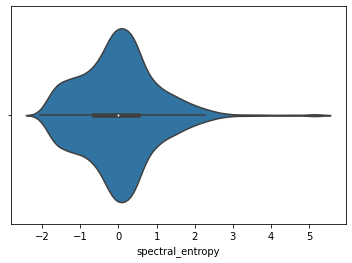

In [54]:
sns.violinplot(x=daily_train_features_scaled.spectral_entropy)

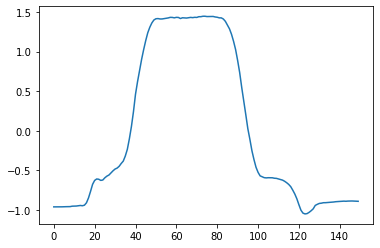

In [19]:
plt.plot(X_train[30, :])

In [6]:
X_train.shape

(50, 150)

In [9]:
X_test.shape

(150, 150)

In [10]:
y_train

array([2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 1, 2], dtype=int64)

In [11]:
y_test

array([1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2,
       2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1], dtype=int64)